<a href="https://colab.research.google.com/github/yenirsmwati/KFC-Analysis/blob/main/Wordcloud_Sentiment_KFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Rating Review

In [ ]:
filepath1 = r"/content/data_kfc_sentiment.csv"
sentiment_kfc= pd.read_csv(filepath1,encoding='ISO-8859-1')

In [ ]:
filepath2 = r"/content/data_mcd_sentiment.csv"
sentiment_mcd= pd.read_csv(filepath2,encoding='ISO-8859-1')

In [ ]:
filepath3= r"/content/data_burger_sentiment.csv"
sentiment_burger= pd.read_csv(filepath3,encoding='ISO-8859-1')

In [ ]:
sentiment_count_kfc = sentiment_kfc['sentiment'].value_counts().sort_index()

In [ ]:
sentiment_count_mcd = sentiment_mcd['sentiment'].value_counts().sort_index()

In [ ]:
sentiment_count_burger = sentiment_burger['sentiment'].value_counts().sort_index()

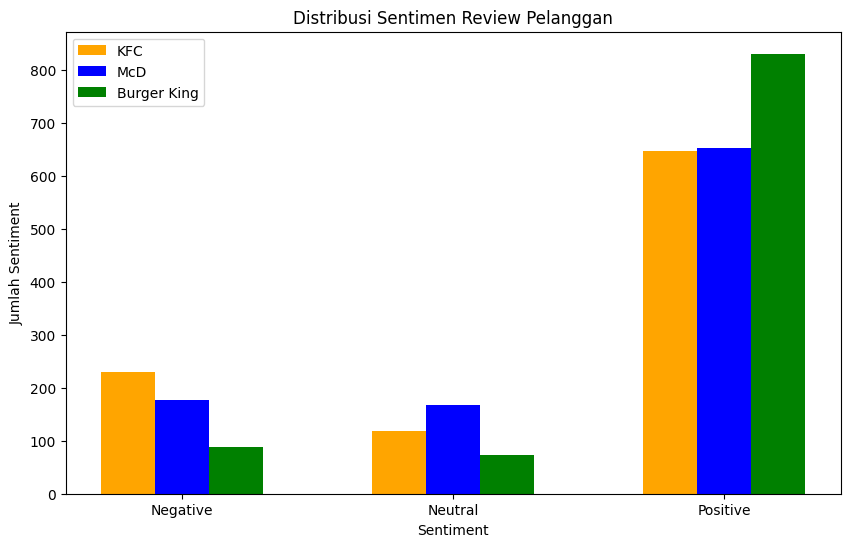

In [ ]:
categories = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(categories))  # [0, 1, 2]

# Ambil sesuai kategori
values_kfc = [sentiment_count_kfc.get(cat, 0) for cat in categories]
values_mcd = [sentiment_count_mcd.get(cat, 0) for cat in categories]
values_burger = [sentiment_count_burger.get(cat, 0) for cat in categories]

plt.figure(figsize=(10,6))

plt.bar(x - 0.2, values_kfc, width=0.2, label='KFC', color='orange')
plt.bar(x, values_mcd, width=0.2, label='McD', color='blue')
plt.bar(x + 0.2, values_burger, width=0.2, label='Burger King', color='green')

plt.xlabel("Sentiment")
plt.ylabel("Jumlah Sentiment")
plt.title("Distribusi Sentimen Review Pelanggan")
plt.xticks(x, categories)
plt.legend()

plt.show()

# Worcloud

In [ ]:
#!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


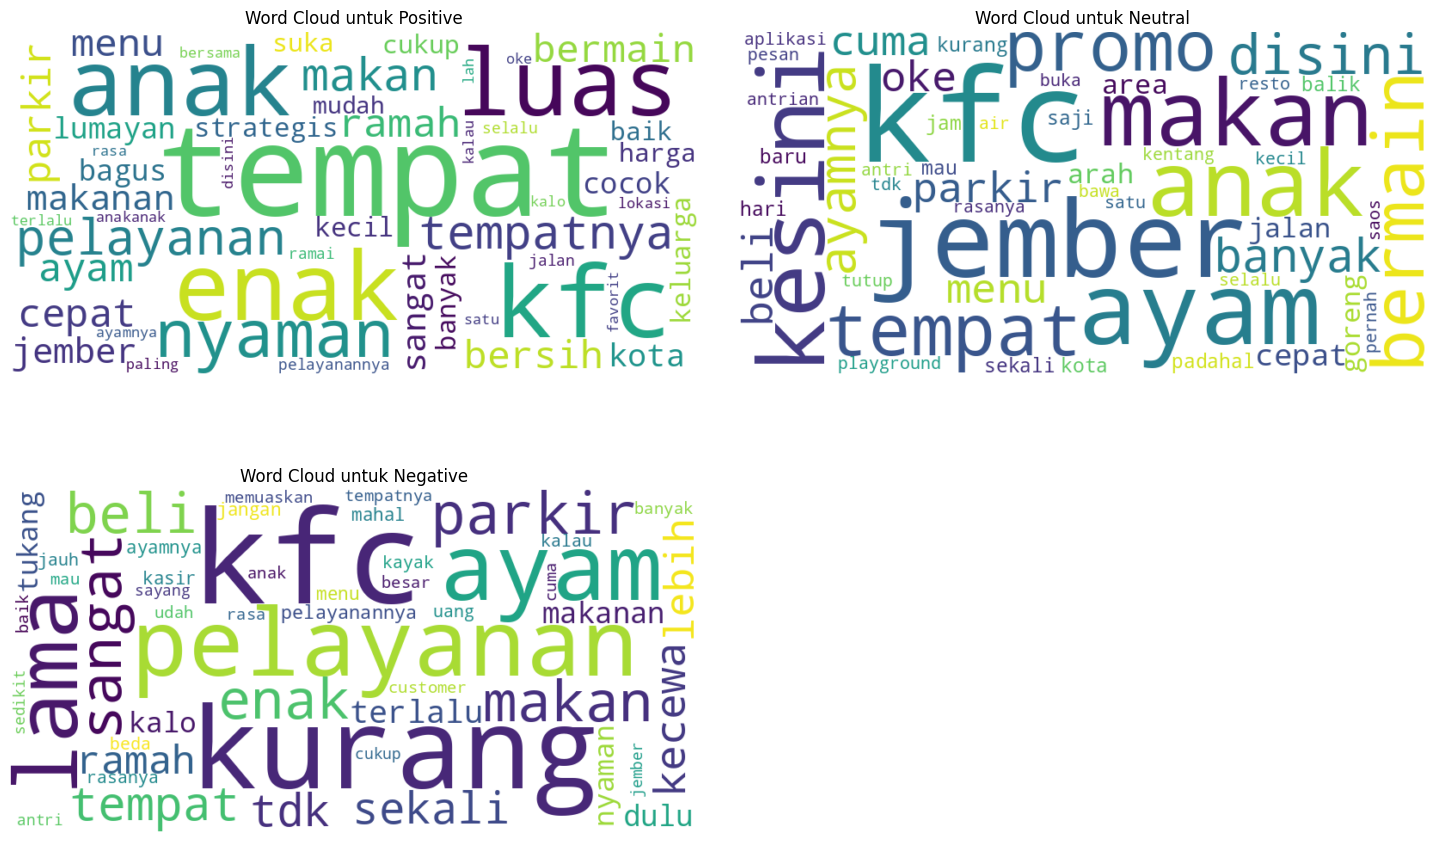

In [ ]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stopword remover dan stemmer
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

# Menambah stopwords kustom
additional_stopwords = {
    'yg', 'dgn', 'nya', 'utk', 'jg', 'sdh', 'aja', 'klo', 'gak', 'ga',
    'krn', 'kyk', 'trs', 'gitu', 'nih', 'sih', 'nya', 'dah', 'tau',
    'tuh', 'saat', 'kan', 'kek', 'emg', 'bgt', 'dong', 'udh', 'bikin',
    'karna', 'pas', 'buat', 'uda', 'kali', 'dari', 'sama', 'banget','jadi'
}
stopwords.extend(additional_stopwords)

def clean_text(text):
    # Case folding
    text = text.lower()

    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Hapus stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Membuat kolom baru dengan teks yang sudah dibersihkan
sentiment_kfc['cleaned_snippet'] = sentiment_kfc['snippet'].apply(clean_text)

# Daftar kategori
labels = sentiment_kfc['sentiment'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan teks dari kolom cleaned_snippet
    category_text = ' '.join(sentiment_kfc[sentiment_kfc['sentiment'] == label]['cleaned_snippet'])

    # Membuat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,
        collocations=False,
        normalize_plurals=True,
        regexp=r"\w+",
        min_word_length=3
    ).generate(category_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)  # Menambah padding antar subplot
plt.show()


In [ ]:
#sentiment_kfc.to_csv('sentiment_kfc_clean')

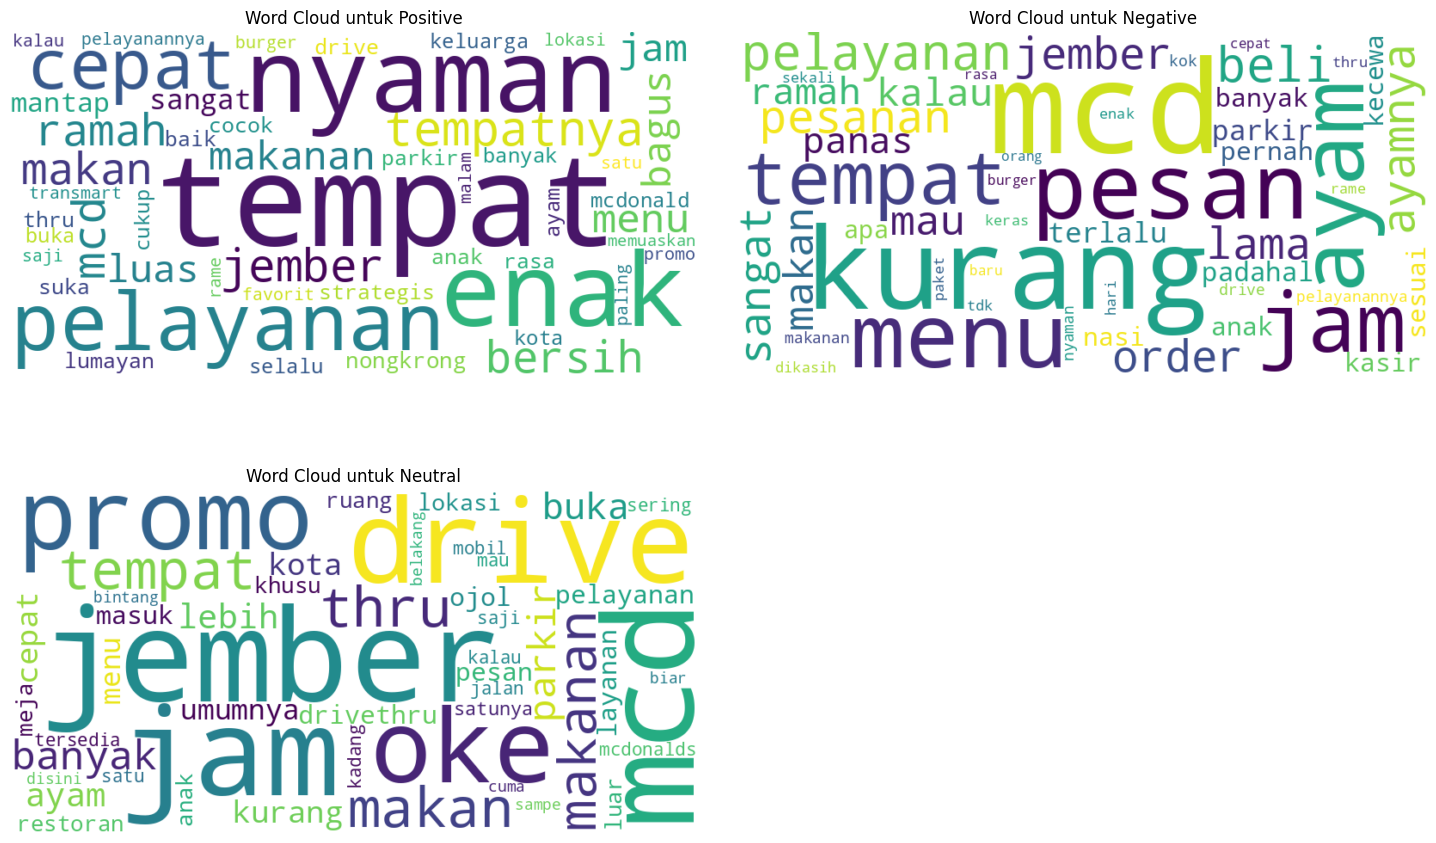

In [ ]:
# Membuat stopword remover dan stemmer
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

# Menambah stopwords kustom
additional_stopwords = {
    'yg', 'dgn', 'nya', 'utk', 'jg', 'sdh', 'aja', 'klo', 'gak', 'ga',
    'krn', 'kyk', 'trs', 'gitu', 'nih', 'sih', 'nya', 'dah', 'tau',
    'tuh', 'saat', 'kan', 'kek', 'emg', 'bgt', 'dong', 'udh', 'bikin',
    'karna', 'pas', 'buat', 'uda', 'kali', 'dari', 'sama', 'banget','jadi'
}
stopwords.extend(additional_stopwords)

def clean_text(text):
    # Case folding
    text = text.lower()

    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Hapus stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Membuat kolom baru dengan teks yang sudah dibersihkan
sentiment_mcd['cleaned_snippet'] = sentiment_mcd['snippet'].apply(clean_text)

# Daftar kategori
labels = sentiment_mcd['sentiment'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan teks dari kolom cleaned_snippet
    category_text = ' '.join(sentiment_mcd[sentiment_mcd['sentiment'] == label]['cleaned_snippet'])

    # Membuat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,
        collocations=False,
        normalize_plurals=True,
        regexp=r"\w+",
        min_word_length=3
    ).generate(category_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
#sentiment_mcd.to_csv('sentiment_mcd_clean')

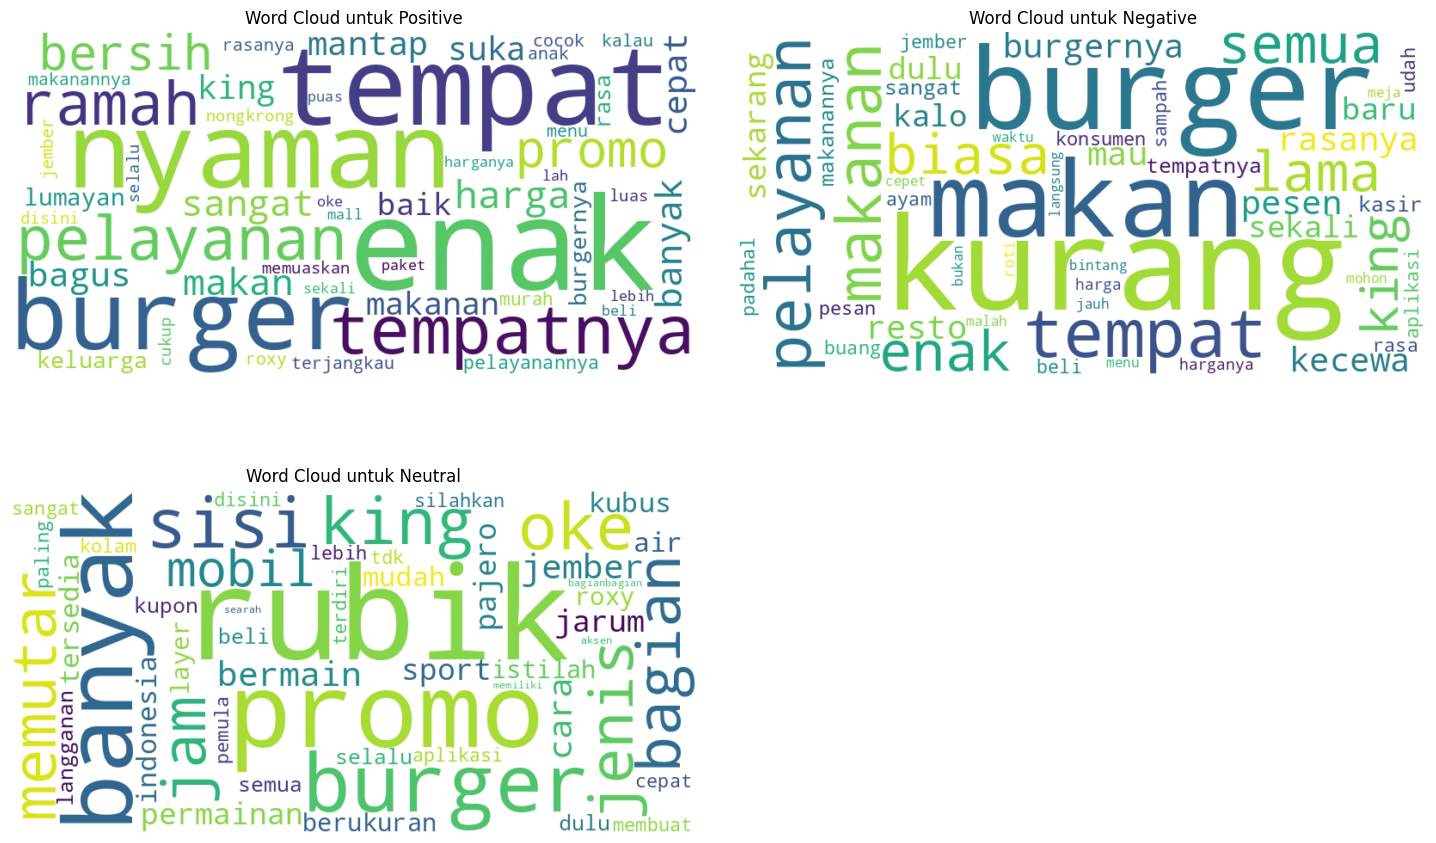

In [ ]:
# Membuat stopword remover dan stemmer
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

# Menambah stopwords kustom
additional_stopwords = {
    'yg', 'dgn', 'nya', 'utk', 'jg', 'sdh', 'aja', 'klo', 'gak', 'ga',
    'krn', 'kyk', 'trs', 'gitu', 'nih', 'sih', 'nya', 'dah', 'tau',
    'tuh', 'saat', 'kan', 'kek', 'emg', 'bgt', 'dong', 'udh', 'bikin',
    'karna', 'pas', 'buat', 'uda', 'kali', 'dari', 'sama', 'banget','jadi'
}
stopwords.extend(additional_stopwords)

def clean_text(text):
    # Case folding
    text = text.lower()

    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Hapus stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Membuat kolom baru dengan teks yang sudah dibersihkan
sentiment_burger['cleaned_snippet'] = sentiment_burger['snippet'].apply(clean_text)

# Daftar kategori
labels = sentiment_burger['sentiment'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan teks dari kolom cleaned_snippet
    category_text = ' '.join(sentiment_burger[sentiment_burger['sentiment'] == label]['cleaned_snippet'])

    # Membuat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,
        collocations=False,
        normalize_plurals=True,
        regexp=r"\w+",
        min_word_length=3
    ).generate(category_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)  # Menambah padding antar subplot
plt.show()

In [ ]:
#sentiment_burger.to_csv('sentiment_burger_clean')

# Sentiment Analysis

In [2]:
import pandas as pd

kfc_clean = pd.read_csv(r"/content/sentiment_kfc_clean")
mcd_clean = pd.read_csv(r"/content/sentiment_mcd_clean")
burger_clean = pd.read_csv(r"/content/sentiment_burger_clean")


In [3]:
kfc_clean.head(1)

,Unnamed: 0.1,Unnamed: 0,rating,snippet,fastfood,date,date_new,date_diff,days_ago,month,sentiment,cleaned_snippet
0,0,0,4,"Tempatx luas banget malah, parkir d belakang j...",KFC,2 minggu lalu,2025-01-21 14:03:11.696541,14 days 00:00:18.810416,14,2025-01,Positive,tempatx luas malah parkir d belakang luas jadi...


In [4]:
kfc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     995 non-null    int64 
 1   Unnamed: 0       995 non-null    int64 
 2   rating           995 non-null    int64 
 3   snippet          995 non-null    object
 4   fastfood         995 non-null    object
 5   date             995 non-null    object
 6   date_new         995 non-null    object
 7   date_diff        995 non-null    object
 8   days_ago         995 non-null    int64 
 9   month            995 non-null    object
 10  sentiment        995 non-null    object
 11  cleaned_snippet  993 non-null    object
dtypes: int64(4), object(8)
memory usage: 93.4+ KB


In [5]:
kfc_clean = kfc_clean.dropna(subset=['cleaned_snippet'])

In [6]:
mcd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     997 non-null    int64 
 1   Unnamed: 0       997 non-null    int64 
 2   rating           997 non-null    int64 
 3   snippet          997 non-null    object
 4   fastfood         997 non-null    object
 5   date             997 non-null    object
 6   date_new         997 non-null    object
 7   date_diff        997 non-null    object
 8   days_ago         997 non-null    int64 
 9   month            997 non-null    object
 10  sentiment        997 non-null    object
 11  cleaned_snippet  986 non-null    object
dtypes: int64(4), object(8)
memory usage: 93.6+ KB


In [7]:
mcd_clean = mcd_clean.dropna(subset=['cleaned_snippet'])

In [8]:
mcd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 996
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     986 non-null    int64 
 1   Unnamed: 0       986 non-null    int64 
 2   rating           986 non-null    int64 
 3   snippet          986 non-null    object
 4   fastfood         986 non-null    object
 5   date             986 non-null    object
 6   date_new         986 non-null    object
 7   date_diff        986 non-null    object
 8   days_ago         986 non-null    int64 
 9   month            986 non-null    object
 10  sentiment        986 non-null    object
 11  cleaned_snippet  986 non-null    object
dtypes: int64(4), object(8)
memory usage: 100.1+ KB


In [9]:
burger_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     993 non-null    int64 
 1   Unnamed: 0       993 non-null    int64 
 2   rating           993 non-null    int64 
 3   snippet          993 non-null    object
 4   fastfood         993 non-null    object
 5   date             993 non-null    object
 6   date_new         993 non-null    object
 7   date_diff        993 non-null    object
 8   days_ago         993 non-null    int64 
 9   month            993 non-null    object
 10  sentiment        993 non-null    object
 11  cleaned_snippet  989 non-null    object
dtypes: int64(4), object(8)
memory usage: 93.2+ KB


In [10]:
burger_clean = burger_clean.dropna(subset=['cleaned_snippet'])

In [11]:
burger_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 992
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     989 non-null    int64 
 1   Unnamed: 0       989 non-null    int64 
 2   rating           989 non-null    int64 
 3   snippet          989 non-null    object
 4   fastfood         989 non-null    object
 5   date             989 non-null    object
 6   date_new         989 non-null    object
 7   date_diff        989 non-null    object
 8   days_ago         989 non-null    int64 
 9   month            989 non-null    object
 10  sentiment        989 non-null    object
 11  cleaned_snippet  989 non-null    object
dtypes: int64(4), object(8)
memory usage: 100.4+ KB


### 1. Mencari kata terbanyak

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

kfc_negatif = kfc_clean[kfc_clean['sentiment'] == 'Negative']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(kfc_negatif['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))


kfc          78
kurang       59
pelayanan    38
ayam         37
lama         32
sangat       23
parkir       23
makan        22
beli         21
enak         21
dtype: int64


In [13]:
kfc_positif = kfc_clean[kfc_clean['sentiment'] == 'Positive']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(kfc_positif['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))

tempat       262
kfc          139
enak         126
anak         124
luas         121
nyaman       119
pelayanan    103
tempatnya     99
makan         92
ramah         70
dtype: int64


In [14]:
mcd_negatif = mcd_clean[mcd_clean['sentiment'] == 'Negative']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(mcd_negatif['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))

mcd          51
kurang       38
sy           30
pesan        24
menu         23
ayam         22
jam          19
tempat       19
pelayanan    19
beli         18
dtype: int64


In [15]:
mcd_positive = mcd_clean[mcd_clean['sentiment'] == 'Positive']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(mcd_positive['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))

tempat       180
nyaman       107
enak         106
pelayanan    101
cepat         75
tempatnya     73
jember        65
mcd           65
bersih        60
makan         59
dtype: int64


In [16]:
burger_negative = burger_clean[burger_clean['sentiment'] == 'Negative']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(burger_negative['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))

kurang       17
burger       13
makan        11
tempat       11
makanan       9
pelayanan     9
gk            8
biasa         7
lama          7
enak          7
dtype: int64


In [17]:
burger_positive = burger_clean[burger_clean['sentiment'] == 'Positive']

# Buat model CountVectorizer untuk kata-kata yang sering muncul
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(burger_positive['cleaned_snippet'])

# Hitung kata yang sering muncul
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata/frasa yang paling sering muncul
print(word_freq.head(10))

enak         237
tempat       168
nyaman       158
burger       139
tempatnya    135
pelayanan    125
ramah        122
promo         84
bersih        76
harga         72
dtype: int64


### Topic Modeling (LDA - Latent Dirichlet Allocation)

### KFC

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Buat TF-IDF Vectorizer
stop_words_custom = ['dan', 'di', 'ke', 'yang', 'untuk', 'dengan',
                     'yg', 'dgn', 'nya', 'utk', 'jg', 'sdh', 'aja', 'klo', 'gak', 'ga',
                      'krn', 'kyk', 'trs', 'gitu', 'nih', 'sih', 'nya', 'dah', 'tau',
                      'tuh', 'saat', 'kan', 'kek', 'emg', 'bgt', 'dong', 'udh', 'bikin',
                      'karna', 'pas', 'buat', 'uda', 'kali', 'dari', 'sama', 'banget''dari',
                     'pada', 'saya', 'itu', 'ini', 'pk', 'kok', 'tdk', 'lah']

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_custom)
tfidf_matrix = tfidf_vectorizer.fit_transform(kfc_negatif['cleaned_snippet'])

# Terapkan LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topik utama
lda.fit(tfidf_matrix)

# Tampilkan kata-kata yang paling menggambarkan tiap topik
for i, topic in enumerate(lda.components_):
    print(f"Topik {i+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topik 1:
['kfc', 'bersih', 'tempatnya', 'nyaman', 'pelayanan', 'dulu', 'kurang', 'mahal', 'lama', 'sekali']
Topik 2:
['tempat', 'cepat', 'ayamnya', 'enak', 'jagonya', 'makan', 'kurang', 'biasa', 'ayam', 'kfc']
Topik 3:
['menu', 'pelayanannya', 'enak', 'terlalu', 'lama', 'luas', 'memuaskan', 'tempat', 'pelayanan', 'kurang']


In [22]:
# Buat TF-IDF Vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(kfc_positif['cleaned_snippet'])

# Terapkan LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topik utama
lda.fit(tfidf_matrix)

# Tampilkan kata-kata yang paling menggambarkan tiap topik
for i, topic in enumerate(lda.components_):
    print(f"Topik {i+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topik 1:
['parkir', 'cepat', 'bersih', 'ramah', 'enak', 'luas', 'tempatnya', 'tempat', 'pelayanan', 'nyaman']
Topik 2:
['tmpat', 'fast', 'bersantai', 'enak', 'tempat', 'keluarga', 'cocok', 'makan', 'bersama', 'mantap']
Topik 3:
['rame', 'harga', 'kfc', 'menyenangkan', 'selalu', 'suka', 'favorit', 'bermain', 'tempat', 'anak']


### MCD

In [23]:
# Buat TF-IDF Vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(mcd_negatif['cleaned_snippet'])

# Terapkan LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topik utama
lda.fit(tfidf_matrix)

# Tampilkan kata-kata yang paling menggambarkan tiap topik
for i, topic in enumerate(lda.components_):
    print(f"Topik {i+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topik 1:
['jam', 'keras', 'menu', 'umumnya', 'beli', 'deh', 'nyaman', 'burger', 'ayam', 'mcd']
Topik 2:
['buruk', 'ayamnya', 'pesanan', 'kebersihan', 'kecewa', 'gimana', 'pelayanannya', 'pernah', 'mcd', 'kurang']
Topik 3:
['sering', 'mahal', 'lama', 'tempat', 'terlalu', 'kurang', 'bersih', 'parkir', 'rame', 'pelayanan']


### Analisis bigram & trigram menggunakan n-gram

### KFC

In [24]:
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in kfc_negatif['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('pelayanan', 'kurang'), 10), (('tukang', 'parkir'), 9), (('kurang', 'memuaskan'), 8), (('kurang', 'bersih'), 6), (('kfc', 'roxy'), 5), (('terlalu', 'lama'), 5), (('es', 'batu'), 5), (('jagonya', 'ayam'), 4), (('cuci', 'tangan'), 4), (('tukang', 'parkirnya'), 4)]
Trigram Teratas: [(('tukang', 'parkirnya', 'kayak'), 3), (('pelayanan', 'kurang', 'memuaskan'), 3), (('winger', 'bucket', 'dateng'), 2), (('kfc', 'gajah', 'mada'), 2), (('g', 'dapet', 'hero'), 2), (('kfc', 'tukang', 'parkirnya'), 2), (('beli', 'dibawa', 'pulang'), 2), (('parkir', 'dekat', 'pintu'), 2), (('dekat', 'pintu', 'masuk'), 2), (('tukang', 'parkir', 'arogan'), 2)]


In [25]:
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in kfc_positif['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('bermain', 'anak'), 36), (('tempat', 'bermain'), 32), (('parkir', 'luas'), 30), (('tempatnya', 'nyaman'), 26), (('tempat', 'makan'), 26), (('tempat', 'nyaman'), 21), (('anak', 'kecil'), 20), (('pelayanan', 'ramah'), 20), (('tempat', 'parkir'), 19), (('pelayanan', 'cepat'), 16)]
Trigram Teratas: [(('tempat', 'bermain', 'anak'), 20), (('tempat', 'parkir', 'luas'), 8), (('bermain', 'anak', 'anak'), 6), (('makanan', 'cepat', 'saji'), 6), (('pelayanan', 'cepat', 'tempat'), 6), (('pelayanan', 'sangat', 'ramah'), 5), (('makan', 'ayam', 'goreng'), 5), (('parkir', 'luas', 'tempat'), 5), (('arena', 'bermain', 'anak'), 4), (('tempat', 'cuci', 'tangan'), 4)]


### MCD

In [26]:
tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in mcd_negatif['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('drive', 'thru'), 8), (('mcd', 'jember'), 5), (('order', 'lg'), 5), (('happy', 'meal'), 5), (('cuci', 'tangan'), 5), (('ice', 'cream'), 4), (('mau', 'order'), 4), (('es', 'krim'), 4), (('mcd', 'pernah'), 3), (('jam', 'ramai'), 3)]
Trigram Teratas: [(('mau', 'order', 'lg'), 4), (('tempat', 'cuci', 'tangan'), 3), (('terburu', 'sekali', 'sy'), 2), (('sy', 'mau', 'order'), 2), (('es', 'krim', 'cair'), 2), (('semua', 'mcd', 'pernah'), 2), (('tgl', 'mei', 'jam'), 2), (('pilih', 'menu', 'lainnya'), 2), (('nasi', 'uduk', 'mcd'), 2), (('bersih', 'disini', 'mccoffee'), 1)]


In [27]:
tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in mcd_positive['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('tempat', 'nyaman'), 33), (('drive', 'thru'), 30), (('pelayanan', 'cepat'), 23), (('tempat', 'makan'), 21), (('tempatnya', 'nyaman'), 19), (('buka', 'jam'), 17), (('pelayanan', 'ramah'), 17), (('parkir', 'luas'), 17), (('salah', 'satu'), 13), (('tempatnya', 'bersih'), 13)]
Trigram Teratas: [(('salah', 'satu', 'tempat'), 8), (('hotel', 'bandung', 'permai'), 5), (('tempat', 'parkir', 'luas'), 4), (('layanan', 'drive', 'thru'), 4), (('restoran', 'cepat', 'saji'), 4), (('depan', 'transmart', 'jember'), 4), (('luas', 'tempat', 'nyaman'), 4), (('tempat', 'nyaman', 'pelayanan'), 4), (('makanan', 'siap', 'saji'), 4), (('pelayanan', 'ramah', 'tempatnya'), 3)]


### Burger King

In [28]:
tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in burger_negative['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('burger', 'king'), 4), (('pelayanan', 'kurang'), 3), (('roti', 'burger'), 3), (('burger', 'disuruh'), 2), (('masa', 'pandemi'), 2), (('kurang', 'training'), 2), (('lama', 'sekali'), 2), (('tempat', 'cuci'), 2), (('cuci', 'tangan'), 2), (('sangat', 'kecewa'), 2)]
Trigram Teratas: [(('tempat', 'cuci', 'tangan'), 2), (('rating', 'burger', 'king'), 1), (('burger', 'king', 'jember'), 1), (('king', 'jember', 'paksaan'), 1), (('jember', 'paksaan', 'merating'), 1), (('paksaan', 'merating', 'langsung'), 1), (('merating', 'langsung', 'bintang'), 1), (('langsung', 'bintang', 'menanyakan'), 1), (('bintang', 'menanyakan', 'pelayanan'), 1), (('menanyakan', 'pelayanan', 'membuat'), 1)]


In [29]:
tokenizer = RegexpTokenizer(r'\w+')
text_tokens = [tokenizer.tokenize(text.lower()) for text in burger_positive['cleaned_snippet']]

# Gabungkan semua kata
all_words = [word for tokens in text_tokens for word in tokens]

# Buat bigram & trigram
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

# Hitung frekuensi bigram & trigram
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

print("Bigram Teratas:", bigram_freq.most_common(10))
print("Trigram Teratas:", trigram_freq.most_common(10))

Bigram Teratas: [(('burger', 'king'), 49), (('tempatnya', 'nyaman'), 47), (('tempat', 'nyaman'), 42), (('pelayanan', 'ramah'), 33), (('banyak', 'promo'), 25), (('harga', 'terjangkau'), 23), (('tempat', 'bersih'), 20), (('pelayanan', 'baik'), 19), (('pelayanan', 'cepat'), 19), (('tempatnya', 'bersih'), 18)]
Trigram Teratas: [(('tempat', 'nyaman', 'pelayanan'), 7), (('pelayanan', 'sangat', 'ramah'), 6), (('enak', 'tempat', 'nyaman'), 6), (('enak', 'banyak', 'promo'), 6), (('enak', 'tempatnya', 'bersih'), 5), (('enak', 'tempatnya', 'nyaman'), 5), (('tempat', 'nyaman', 'bersih'), 5), (('harga', 'terjangkau', 'harga'), 5), (('terjangkau', 'harga', 'terjangkau'), 5), (('tempatnya', 'bersih', 'nyaman'), 4)]


### Kata kunci dalam setiap sentiment

### KFC

In [30]:
from collections import Counter

# Ambil kata-kata dari masing-masing kategori sentimen
words_neg = ' '.join(kfc_clean[kfc_clean['sentiment'] == 'Negative']['cleaned_snippet']).split()
words_pos = ' '.join(kfc_clean[kfc_clean['sentiment'] == 'Positive']['cleaned_snippet']).split()
words_neu = ' '.join(kfc_clean[kfc_clean['sentiment'] == 'Neutral']['cleaned_snippet']).split()

# Hitung frekuensi kata
neg_counts = Counter(words_neg)
pos_counts = Counter(words_pos)
neu_counts = Counter(words_neu)

print("Kata dominan dalam sentimen negatif:", neg_counts.most_common(10))
print("Kata dominan dalam sentimen positif:", pos_counts.most_common(10))
print("Kata dominan dalam sentimen netral:", neu_counts.most_common(10))

Kata dominan dalam sentimen negatif: [('kfc', 78), ('kurang', 59), ('pelayanan', 38), ('ayam', 37), ('lama', 32), ('parkir', 23), ('sangat', 23), ('makan', 22), ('beli', 21), ('enak', 21)]
Kata dominan dalam sentimen positif: [('tempat', 262), ('kfc', 139), ('enak', 126), ('anak', 124), ('luas', 121), ('nyaman', 119), ('pelayanan', 103), ('tempatnya', 99), ('makan', 92), ('ramah', 70)]
Kata dominan dalam sentimen netral: [('kfc', 17), ('jember', 11), ('ayam', 10), ('kesini', 8), ('makan', 8), ('anak', 8), ('tempat', 7), ('bermain', 7), ('promo', 7), ('disini', 7)]


### MCD

In [31]:
from collections import Counter

# Ambil kata-kata dari masing-masing kategori sentimen
words_neg = ' '.join(mcd_clean[mcd_clean['sentiment'] == 'Negative']['cleaned_snippet']).split()
words_pos = ' '.join(mcd_clean[mcd_clean['sentiment'] == 'Positive']['cleaned_snippet']).split()
words_neu = ' '.join(mcd_clean[mcd_clean['sentiment'] == 'Neutral']['cleaned_snippet']).split()

# Hitung frekuensi kata
neg_counts = Counter(words_neg)
pos_counts = Counter(words_pos)
neu_counts = Counter(words_neu)

print("Kata dominan dalam sentimen negatif:", neg_counts.most_common(10))
print("Kata dominan dalam sentimen positif:", pos_counts.most_common(10))
print("Kata dominan dalam sentimen netral:", neu_counts.most_common(10))

Kata dominan dalam sentimen negatif: [('mcd', 51), ('kurang', 38), ('sy', 30), ('pesan', 24), ('menu', 23), ('ayam', 22), ('jam', 19), ('tempat', 19), ('pelayanan', 19), ('beli', 18)]
Kata dominan dalam sentimen positif: [('tempat', 180), ('nyaman', 107), ('enak', 106), ('pelayanan', 101), ('cepat', 75), ('tempatnya', 73), ('jember', 65), ('mcd', 65), ('bersih', 60), ('makan', 59)]
Kata dominan dalam sentimen netral: [('jember', 21), ('mcd', 20), ('jam', 19), ('drive', 17), ('oke', 13), ('promo', 12), ('tempat', 11), ('makan', 11), ('thru', 11), ('makanan', 10)]


### Burger King

In [32]:
from collections import Counter

# Ambil kata-kata dari masing-masing kategori sentimen
words_neg = ' '.join(burger_clean[burger_clean['sentiment'] == 'Negative']['cleaned_snippet']).split()
words_pos = ' '.join(burger_clean[burger_clean['sentiment'] == 'Positive']['cleaned_snippet']).split()
words_neu = ' '.join(burger_clean[burger_clean['sentiment'] == 'Neutral']['cleaned_snippet']).split()

# Hitung frekuensi kata
neg_counts = Counter(words_neg)
pos_counts = Counter(words_pos)
neu_counts = Counter(words_neu)

print("Kata dominan dalam sentimen negatif:", neg_counts.most_common(10))
print("Kata dominan dalam sentimen positif:", pos_counts.most_common(10))
print("Kata dominan dalam sentimen netral:", neu_counts.most_common(10))

Kata dominan dalam sentimen negatif: [('kurang', 17), ('burger', 13), ('makan', 11), ('tempat', 11), ('pelayanan', 9), ('makanan', 9), ('gk', 8), ('semua', 7), ('enak', 7), ('biasa', 7)]
Kata dominan dalam sentimen positif: [('enak', 237), ('tempat', 168), ('nyaman', 158), ('burger', 139), ('tempatnya', 135), ('pelayanan', 125), ('ramah', 122), ('promo', 84), ('bersih', 76), ('harga', 72)]
Kata dominan dalam sentimen netral: [('rubik', 32), ('promo', 20), ('banyak', 16), ('burger', 11), ('sisi', 8), ('king', 7), ('oke', 7), ('jenis', 6), ('bagian', 6), ('memutar', 6)]
